# 032 GDAL: mosaicing and masking : Answers to exercises

#### Exercise 1

Recall that the MODIS LAI data need a scaling factor of 0.1 applied, and that values of greater than 100 are invalid.


For the dataset described by:

    kwargs = {
        'tile'      :    ['h17v03'],
        'product'   :    'MCD15A3H',
        'sds'       :    'Lai_500m',
    }
    doy = 41
    year = 2019

* Use `gdal` to read the data into a `numpy` array called lai
* print the shape of the array `lai`
* Find the maximum valid LAI value in the dataset
* find at least one pixel (row, column) which has that maximum value.

You will need to recall how to filter and [mask `numpy` arrays](026_Numpy.ipynb#argmin,-argmax-and-masking) and use [`np.where`](026_Numpy.ipynb#where).

In [3]:
# ANSWER
# dont forget to import the packages you need
from geog0111.modis import Modis
import gdal
import numpy as np

# Use gdal to read the data into a numpy array called lai
kwargs = {
    'tile'      :    ['h17v03'],
    'product'   :    'MCD15A3H',
    'sds'       :    'Lai_500m',
}
doy = 41
year = 2019
modis = Modis(**kwargs)
files,sds = modis.get_files(year,doy)
g = gdal.Open(sds[0][0])
lai = g.ReadAsArray()
# print the shape of the array `lai`
print(f'shape of lai: {lai.shape}')

shape of lai: (2400, 2400)


In [4]:
# Find the maximum valid LAI value in the dataset
# first filter for valid
valid_mask = (lai <= 100)
# now apply, and scale
max_lai = lai[valid_mask].max()
print(f'max LAI is {max_lai * 0.1}')

# find pixels where it equals the max
where_max_mask = (lai == max_lai)

# find at least one pixel (row, column) 
# which has that maximum value.
row,col = np.where(where_max_mask)
print(row[0],col[0])

max LAI is 7.0
111 2199


#### Exercise 2

* write a function called `stitch_me` that you give the arguments:

    * year
    * doy
    
and keywords/defaults:
    
    * sds='Lai_500m'
    * tile=['h17v03','h18v03']
    * product='MCD15A3H'
    
that then generates a stitched VRT file with the appropriate data, and returns the VRT filename. Make sure to use the `year` and `doy` in the VRT filename.

#### Exercise 3

* For doy 41 2019, extract and plot LAI of the sub-region around London by defining the approximate pixel coordinates of the area


For doy 41 2019, extract and plot 
LAI of the sub-region around the 
London by defining the 
pixel coordinates of the area

We can identify Corsica from searching for maps.
We can see from the images above and a little trial
and error that this is approximately

r0,r1 = 1900,2150
c0,c1 = 2250,2500




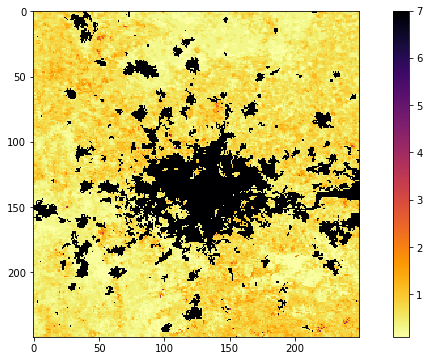

In [10]:
# ANSWER
msg = '''
For doy 41 2019, extract and plot 
LAI of the sub-region around the 
London by defining the 
pixel coordinates of the area

We can identify Corsica from searching for maps.
We can see from the images above and a little trial
and error that this is approximately

r0,r1 = 1900,2150
c0,c1 = 2250,2500

'''

ofile = f"work/stitch_full_{year}_{doy:03d}.vrt"
stitch_vrt = gdal.Open(ofile)

# get the lai data as sub-set directly
r0,r1 = 1900,2150
c0,c1 = 2250,2500

london = stitch_vrt.ReadAsArray(c0,r0,c1-c0,r1-r0)*0.1

fig, axs = plt.subplots(1,1,figsize=(12,6))
im = axs.imshow(london,vmax=7,\
                cmap=plt.cm.inferno_r,interpolation='nearest')
fig.colorbar(im, ax=axs)
print(msg)

In [11]:
    
def stitch_me(year,doy,sds='Lai_500m',\
              tile=['h17v03','h18v03'],\
              product='MCD15A3H'):
    '''
    function called stitch_me with arguments:
    
    year
    doy

    keywords/defaults:

        sds      : 'Lai_500m'
        tile     : ['h17v03','h18v03','h17v04','h18v04']
        product  : 'MCD15A3H'

    generates a stitched VRT file with the appropriate data,

    returns VRT filename for this dataset.
    '''
    # set up kwargs for MODIS
    kwargs = {
        'tile'      :    tile,
        'product'   :    product,
        'sds'       :    sds,
    }
    # set up MODIS object
    modis = Modis(**kwargs)
    # get filenames and SDS for this year/doy
    files,sds = modis.get_files(year,doy)

    # Make sure to use the year and doy in the VRT filename.
    ofile = f"work/stitch_{year}_{doy:03d}.vrt"

    # build a VRT     
    stitch_vrt = gdal.BuildVRT(ofile, sds[0])
    return ofile

work/stitch_2019_041.vrt


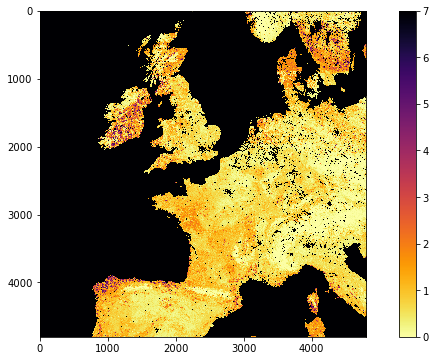

In [12]:
import matplotlib.pyplot as plt

# test
sfile = stitch_me(2019,41)
print(sfile)

g = gdal.Open(sfile)
# see if opens
if g:
    fig, axs = plt.subplots(1,1,figsize=(12,6))
    im = axs.imshow(stitch_vrt.ReadAsArray()*0.1,vmax=7,\
                    cmap=plt.cm.inferno_r,interpolation='nearest')
    fig.colorbar(im, ax=axs)
else:
    print('test failed')

#### Exercise 4

* Plot the LAI for Luxemburg (`"FIPS='LU'"`) for doy 46, 2019
* find the mean LAI for Luxemburg for doy 46, 2019 to 2 d.p.


Plot the LAI for Luxemburg ("FIPS='LU'") for doy 46, 2019

This is essentially a straight copy from the notes aboive, changing UK for LU
But if we do that, we will not have the correct tiles to cover Luxemburg
We need to make sure we use ['h18v04','h18v03'] to get the whole country



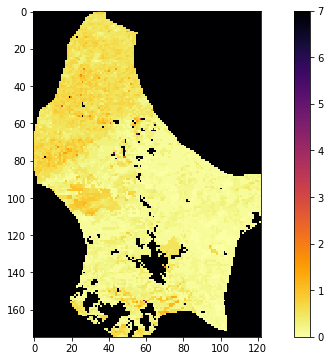

In [14]:
# ANSWER

import gdal
from geog0111.modis import Modis
import matplotlib.pyplot as plt

msg = '''
Plot the LAI for Luxemburg ("FIPS='LU'") for doy 46, 2019

This is essentially a straight copy from the notes aboive, changing UK for LU
But if we do that, we will not have the correct tiles to cover Luxemburg
We need to make sure we use ['h18v04','h18v03'] to get the whole country
'''

# only choose the tiles we need to make more efficient
# ['h18v04','h18v03']
kwargs = {
    'tile'      :    ['h18v04','h18v03'],
    'product'   :    'MCD15A3H',
    'sds'       :    'Lai_500m',
}
doy = 41
year = 2019

modis = Modis(**kwargs)
files,sds = modis.get_files(year,doy)

warp_args = {
    'dstNodata'     : 255,
    'format'        : 'MEM',
    'cropToCutline' : True,
    'cutlineWhere'  : "FIPS='LU'",
    'cutlineDSName' : 'data/TM_WORLD_BORDERS-0.3.shp'
}
# build a VRT 
stitch_vrt = gdal.BuildVRT("work/stitch_lu.vrt", sds[0])
del stitch_vrt
g = gdal.Warp("", "work/stitch_lu.vrt",**warp_args)

fig, axs = plt.subplots(1,1,figsize=(12,6))
im = axs.imshow(g.ReadAsArray()*0.1,vmax=7,\
                cmap=plt.cm.inferno_r,interpolation='nearest')
fig.colorbar(im, ax=axs)
print(msg)


In [15]:
import numpy as np
msg = '''
Find the mean LAI for Luxemburg for doy 46, 2019 to 2 d.p.

For this part, we need to build a mask of valid data points
Then find the mean LAI over that set.
'''
print(msg)

# dataset scaled
lai = g.ReadAsArray()*0.1

# mask for valid
mask = (lai <= 10.0)

mean_lai = np.mean(lai[mask])

# mean
print(f'Mean LAI for LU for doy {doy} {year} is {mean_lai :.2f}')


Find the mean LAI for Luxemburg for doy 46, 2019 to 2 d.p.

For this part, we need to build a mask of valid data points
Then find the mean LAI over that set.

Mean LAI for LU for doy 41 2019 is 0.35


#### Exercise 5

* Use `Modis.get_modis` to plot the LAI for France for doy 49, 2019
* find the median LAI for France for doy 49, 2019 to 2 d.p.


Use Modis.get_modis to plot the LAI for France for doy 49, 2019

This is mostly a copy from the code in the notes. But again we need
to check the tiles to use. We can find that this should be 
['h17v03','h17v04','h18v03','h18v04']

We also need to change the doy from 41 to 49 !!!

We also need to look up the FIPS code for France, since this 
is not given. This can be found to be "FIPS='FR'" from a quick 
search.



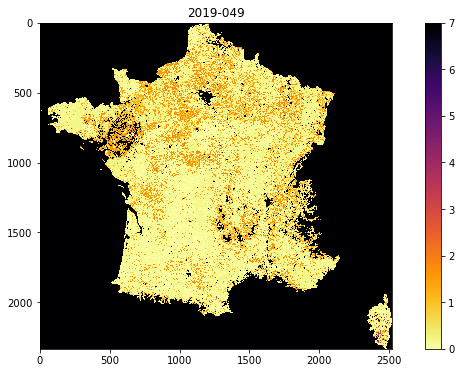

In [18]:
import gdal
from geog0111.modis import Modis
import matplotlib.pyplot as plt

msg = '''
Use Modis.get_modis to plot the LAI for France for doy 49, 2019

This is mostly a copy from the code in the notes. But again we need
to check the tiles to use. We can find that this should be 
['h17v03','h17v04','h18v03','h18v04']

We also need to change the doy from 41 to 49 !!!

We also need to look up the FIPS code for France, since this 
is not given. This can be found to be "FIPS='FR'" from a quick 
search.
'''

kwargs = {
    'tile'      :    ['h17v03','h17v04','h18v03','h18v04'],
    'product'   :    'MCD15A3H',
    'sds'       :    'Lai_500m',
}
doy = 49
year = 2019

modis = Modis(**kwargs)

warp_args = {
    'dstNodata'     : 255,
    'format'        : 'MEM',
    'cropToCutline' : True,
    'cutlineWhere'  : "FIPS='FR'",
    'cutlineDSName' : 'data/TM_WORLD_BORDERS-0.3.shp'
}

# getting the dataset is this simple
mfiles = modis.get_modis(year,doy,warp_args=warp_args)

# This is just plotting 
g = gdal.Open(mfiles['Lai_500m'])
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = axs.imshow(g.ReadAsArray()*0.1,vmax=7,\
                cmap=plt.cm.inferno_r,interpolation='nearest')
axs.set_title(mfiles['bandnames'][0])
fig.colorbar(im, ax=axs)

print(msg)

In [19]:

msg = '''
find the median LAI for France for doy 49, 2019 to 2 d.p.

Same as exercise 3, but motice median is asked for

For this part, we need to build a mask of valid data points
Then find the mean LAI over that set.
'''
print(msg)

# dataset scaled
lai = g.ReadAsArray()*0.1

# mask for valid
mask = (lai <= 10.0)

# np.median
mean_lai = np.median(lai[mask])

# mean
print(f'Mean LAI for LU for doy {doy} {year} is {mean_lai :.2f}')


find the median LAI for France for doy 49, 2019 to 2 d.p.

Same as exercise 3, but motice median is asked for

For this part, we need to build a mask of valid data points
Then find the mean LAI over that set.

Mean LAI for LU for doy 49 2019 is 0.20
